In [88]:
# 데이터의 타당성을 높이기 위해 주성분 분석을 실시한다.
# 데이터의 벡터간 scale을 맞추기 위해 정규화를 진행하고 시작한다.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt # scree plot 그리기 위해 설치
import seaborn as sns

from sklearn.preprocessing import StandardScaler # 데이터 표준화 위해 설치
from sklearn.decomposition import PCA # PCA 하기 위해 설치

In [11]:
# 사용할 파일 불러오기

tomato = pd.read_csv('C:/Users/chuu/Documents/GitHub/Learning_Spoons_Second_Project/data/tomatoma_final.csv', encoding = 'cp949')
tomato

,일시,도_num,연도,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr),품종명,도,마켓명,가격
0,2013-01-02,0,2013,0.005504,0.503030,0.030148,0.009233,35.018939,37.602906,8.300000,토마토(10kg),강원도,가락도매,29000.0
1,2013-01-02,1,2013,0.005632,0.417254,0.023083,0.018736,24.678419,37.602906,8.820000,토마토(10kg),경기도,가락도매,29000.0
2,2013-01-02,2,2013,0.006906,0.467460,0.024183,0.014894,24.450397,37.602906,6.133333,토마토(10kg),인천광역시,가락도매,29000.0
3,2013-01-02,3,2013,0.004950,0.403021,0.024425,0.021413,18.644792,37.602906,9.100000,토마토(10kg),서울특별시,가락도매,29000.0
4,2013-01-02,4,2013,0.005591,0.567593,0.025477,0.011117,44.833333,37.602906,7.980000,토마토(10kg),경상북도,북부도매,29000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22075,2018-12-31,10,2018,0.003241,0.502206,0.018193,0.023311,22.787681,12.066176,6.600000,토마토(10kg),울산광역시,엄궁도매,30000.0
22076,2018-12-31,11,2018,0.003150,0.475868,0.017313,0.022639,29.648866,19.518839,5.921429,토마토(10kg),경상남도,엄궁도매,30000.0
22077,2018-12-31,12,2018,0.003204,0.605093,0.015468,0.027125,34.759259,22.728704,9.200000,토마토(10kg),광주광역시,각화도매,31000.0
22078,2018-12-31,13,2018,0.004119,0.373418,0.014718,0.027532,28.525591,15.960829,5.700000,토마토(10kg),부산광역시,엄궁도매,30000.0


In [43]:
# 분석 전 테스트 데이터로 쓰일 2018 데이터 제외하고 시작
tomato1317 = tomato[tomato['일시'].str.contains('2013|2014|2015|2016|2017')]
tomato1317

,일시,도_num,연도,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr),품종명,도,마켓명,가격
0,2013-01-02,0,2013,0.005504,0.503030,0.030148,0.009233,35.018939,37.602906,8.300000,토마토(10kg),강원도,가락도매,29000.0
1,2013-01-02,1,2013,0.005632,0.417254,0.023083,0.018736,24.678419,37.602906,8.820000,토마토(10kg),경기도,가락도매,29000.0
2,2013-01-02,2,2013,0.006906,0.467460,0.024183,0.014894,24.450397,37.602906,6.133333,토마토(10kg),인천광역시,가락도매,29000.0
3,2013-01-02,3,2013,0.004950,0.403021,0.024425,0.021413,18.644792,37.602906,9.100000,토마토(10kg),서울특별시,가락도매,29000.0
4,2013-01-02,4,2013,0.005591,0.567593,0.025477,0.011117,44.833333,37.602906,7.980000,토마토(10kg),경상북도,북부도매,29000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18415,2017-12-29,10,2017,0.004550,0.930384,0.023088,0.033774,81.213251,41.930678,8.300000,토마토(10kg),울산광역시,엄궁도매,21000.0
18416,2017-12-29,11,2017,0.004742,0.748507,0.021643,0.028905,81.940972,39.022832,6.742857,토마토(10kg),경상남도,엄궁도매,21000.0
18417,2017-12-29,12,2017,0.003583,0.828460,0.008503,0.040649,83.175926,59.228704,0.100000,토마토(10kg),광주광역시,각화도매,22000.0
18418,2017-12-29,13,2017,0.004547,0.500735,0.020633,0.032862,88.154762,60.079365,8.300000,토마토(10kg),부산광역시,엄궁도매,21000.0


In [44]:
# 분석에 사용할 독립변수 컬럼 따로 빼기
tom_f = tomato1317.iloc[:,3:10]
tom_f

,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr)
0,0.005504,0.503030,0.030148,0.009233,35.018939,37.602906,8.300000
1,0.005632,0.417254,0.023083,0.018736,24.678419,37.602906,8.820000
2,0.006906,0.467460,0.024183,0.014894,24.450397,37.602906,6.133333
3,0.004950,0.403021,0.024425,0.021413,18.644792,37.602906,9.100000
4,0.005591,0.567593,0.025477,0.011117,44.833333,37.602906,7.980000
...,...,...,...,...,...,...,...
18415,0.004550,0.930384,0.023088,0.033774,81.213251,41.930678,8.300000
18416,0.004742,0.748507,0.021643,0.028905,81.940972,39.022832,6.742857
18417,0.003583,0.828460,0.008503,0.040649,83.175926,59.228704,0.100000
18418,0.004547,0.500735,0.020633,0.032862,88.154762,60.079365,8.300000


In [45]:
# 데이터의 스케일을 맞추기 위해 표준화 한다.

tomato_std = StandardScaler().fit_transform(tom_f)
tomato_std = pd.DataFrame(tomato_std)
tomato_std.columns=['SO2','CO','O3','NO2','PM10','PM25','합계 일조시간(hr)']
tomato_std

,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr)
0,0.441394,0.043635,0.247346,-1.203314,-0.463005,1.376123,0.487941
1,0.503380,-0.453949,-0.347586,-0.283898,-0.900447,1.376123,0.625639
2,1.120373,-0.162705,-0.255016,-0.655642,-0.910093,1.376123,-0.085799
3,0.173012,-0.536517,-0.234597,-0.024985,-1.155692,1.376123,0.699783
4,0.483322,0.418160,-0.146014,-1.021102,-0.047820,1.376123,0.403204
...,...,...,...,...,...,...,...
18415,-0.020681,2.522705,-0.347199,1.170941,1.491183,1.851726,0.487941
18416,0.072117,1.467641,-0.468856,0.699868,1.521968,1.532166,0.075605
18417,-0.489098,1.931446,-1.575442,1.836169,1.574212,3.752703,-1.683443
18418,-0.022369,0.030322,-0.553948,1.082769,1.784835,3.846187,0.487941


In [46]:
# 공분산 행렬 구하기
tom_cov = np.cov(tomato_std.T)
tom_cov

array([[ 1.00005429,  0.53423781, -0.09939483,  0.5335232 ,  0.45368222,
         0.31564041,  0.09412671],
       [ 0.53423781,  1.00005429, -0.35493315,  0.67604501,  0.57333175,
         0.50560091, -0.10035827],
       [-0.09939483, -0.35493315,  1.00005429, -0.42643688,  0.10565621,
        -0.04314254,  0.35630639],
       [ 0.5335232 ,  0.67604501, -0.42643688,  1.00005429,  0.45965477,
         0.37364806,  0.01015722],
       [ 0.45368222,  0.57333175,  0.10565621,  0.45965477,  1.00005429,
         0.54062113,  0.11859521],
       [ 0.31564041,  0.50560091, -0.04314254,  0.37364806,  0.54062113,
         1.00005429,  0.02408279],
       [ 0.09412671, -0.10035827,  0.35630639,  0.01015722,  0.11859521,
         0.02408279,  1.00005429]])

In [47]:
# 고유값과 고유벡터 계산 (고유분해)
eig_vals, eig_vecs= np.linalg.eig(tom_cov)

In [48]:
# 고유값 확인
eig_vals

array([3.07458189, 1.49794446, 0.83632267, 0.60524902, 0.4337325 ,
       0.26701225, 0.28553726])

In [49]:
# 고유벡터 확인
eig_vecs

array([[-0.40917673, -0.11824531,  0.34158924, -0.62951544, -0.52072008,
        -0.17092062,  0.07250026],
       [-0.5012072 ,  0.11045343, -0.03206704,  0.01213009,  0.20015389,
         0.63444848,  0.54113723],
       [ 0.18970678, -0.66775137, -0.2511086 , -0.36337933,  0.07837575,
         0.48268683, -0.28963778],
       [-0.46993675,  0.14601195,  0.32932478,  0.13074602,  0.23377915,
         0.17462991, -0.7396907 ],
       [-0.42180621, -0.32702   , -0.28367735, -0.11605364,  0.55480072,
        -0.55044209,  0.10200895],
       [-0.38283314, -0.17976339, -0.52777052,  0.45364084, -0.56535959,
        -0.01738471, -0.12984021],
       [ 0.00740527, -0.60609384,  0.59309662,  0.48493882, -0.0236276 ,
        -0.03860534,  0.20884809]])

In [96]:
# 주성분의 고유값 비율 확인
eig_vals_sum = np.sum(eig_vals)
for eig_val in eig_vals:
    print (str(eig_val/eig_vals_sum))

0.4392021391330148
0.21398044879345662
0.11946818122916787
0.08645945167480919
0.06195842135502563
0.03814253574131579
0.04078882207321002


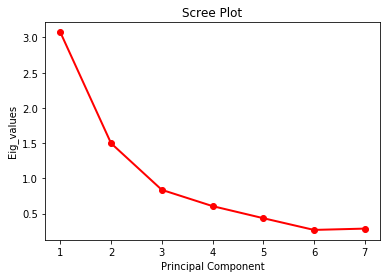

In [90]:
# 위 데이터를 이용해 scree plot 그려서 고유값 확인. 주성분 개수를 정할 때 한 눈에 볼 수 있어서 좋다.
sing_vals = np.arange(len(eig_vals))+1
plt.plot(sing_vals, eig_vals, "ro-", linewidth=2)
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Eig_values")
plt.show()

In [101]:
# 주성분의 개수를 4개로 하여 주성분 분석
pca = PCA(n_components = 4)
pca

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [102]:
# 각 주성분 데이터들을 찾아서 array로 만든다.
pca_values = pca.fit_transform(tomato_std)
pca_values

array([[-0.08201247,  0.77993962,  0.61455231, -0.39007624],
       [ 0.05335233,  0.25112216, -0.08051679, -0.79895684],
       [ 0.26072725, -0.02634942,  0.28294873,  0.01204306],
       ...,
       [ 4.04281974, -1.42220185,  2.65428202, -1.84719819],
       [ 2.84165418,  1.03682771,  1.75975485, -2.13158275],
       [ 1.48852573, -0.26469224,  1.14489282, -0.08568667]])

In [103]:
# 고유값의 누적 설명력 확인. 80% 넘는것을 확인할 수 있다.
sum(pca.explained_variance_ratio_)

0.859110220830449

In [104]:
# 위에서 구한 주성분으로 이루어진 데이터 프레임 생성
pcadf = pd.DataFrame(data=pca_values, columns = ['PC1', 'PC2','PC3','PC4'])
pcadf

,PC1,PC2,PC3,PC4
0,-0.082012,0.779940,0.614552,-0.390076
1,0.053352,0.251122,-0.080517,-0.798957
2,0.260727,-0.026349,0.282949,0.012043
3,-0.131185,0.220290,-0.143591,-1.064299
4,0.458864,0.538673,0.621493,-0.445712
...,...,...,...,...
18415,3.206349,0.432357,0.726061,-1.226463
18416,2.410920,0.250118,0.869750,-0.789369
18417,4.042820,-1.422202,2.654282,-1.847198
18418,2.841654,1.036828,1.759755,-2.131583


In [121]:
# 처음 데이터의 변수부분을 빼고 주성분 분석으로 구한 데이터 프레임과 합친다.
# 처음 데이터의 변수부분을 제외한 좌 우 데이터를 만든다.
tom_1 = tomato1317.iloc[:,0:3]
tom_2 = tomato1317.iloc[:,-4:]

In [123]:
# 데이터 병합 후 확인
tom_fin = pd.concat([tom_1,pcadf,tom_2],axis=1)
tom_fin

,일시,도_num,연도,PC1,PC2,PC3,PC4,품종명,도,마켓명,가격
0,2013-01-02,0,2013,-0.082012,0.779940,0.614552,-0.390076,토마토(10kg),강원도,가락도매,29000.0
1,2013-01-02,1,2013,0.053352,0.251122,-0.080517,-0.798957,토마토(10kg),경기도,가락도매,29000.0
2,2013-01-02,2,2013,0.260727,-0.026349,0.282949,0.012043,토마토(10kg),인천광역시,가락도매,29000.0
3,2013-01-02,3,2013,-0.131185,0.220290,-0.143591,-1.064299,토마토(10kg),서울특별시,가락도매,29000.0
4,2013-01-02,4,2013,0.458864,0.538673,0.621493,-0.445712,토마토(10kg),경상북도,북부도매,29000.0
...,...,...,...,...,...,...,...,...,...,...,...
18415,2017-12-29,10,2017,3.206349,0.432357,0.726061,-1.226463,토마토(10kg),울산광역시,엄궁도매,21000.0
18416,2017-12-29,11,2017,2.410920,0.250118,0.869750,-0.789369,토마토(10kg),경상남도,엄궁도매,21000.0
18417,2017-12-29,12,2017,4.042820,-1.422202,2.654282,-1.847198,토마토(10kg),광주광역시,각화도매,22000.0
18418,2017-12-29,13,2017,2.841654,1.036828,1.759755,-2.131583,토마토(10kg),부산광역시,엄궁도매,21000.0


In [126]:
# 데이터 저장
tom_fin.to_csv('tom_fin.csv',encoding = 'cp949')

In [128]:
# 저장된 데이터 확인
pd.read_csv('tom_fin.csv', encoding = 'cp949')

,Unnamed: 0,일시,도_num,연도,PC1,PC2,PC3,PC4,품종명,도,마켓명,가격
0,0,2013-01-02,0,2013,-0.082012,0.779940,0.614552,-0.390076,토마토(10kg),강원도,가락도매,29000.0
1,1,2013-01-02,1,2013,0.053352,0.251122,-0.080517,-0.798957,토마토(10kg),경기도,가락도매,29000.0
2,2,2013-01-02,2,2013,0.260727,-0.026349,0.282949,0.012043,토마토(10kg),인천광역시,가락도매,29000.0
3,3,2013-01-02,3,2013,-0.131185,0.220290,-0.143591,-1.064299,토마토(10kg),서울특별시,가락도매,29000.0
4,4,2013-01-02,4,2013,0.458864,0.538673,0.621493,-0.445712,토마토(10kg),경상북도,북부도매,29000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18415,18415,2017-12-29,10,2017,3.206349,0.432357,0.726061,-1.226463,토마토(10kg),울산광역시,엄궁도매,21000.0
18416,18416,2017-12-29,11,2017,2.410920,0.250118,0.869750,-0.789369,토마토(10kg),경상남도,엄궁도매,21000.0
18417,18417,2017-12-29,12,2017,4.042820,-1.422202,2.654282,-1.847198,토마토(10kg),광주광역시,각화도매,22000.0
18418,18418,2017-12-29,13,2017,2.841654,1.036828,1.759755,-2.131583,토마토(10kg),부산광역시,엄궁도매,21000.0


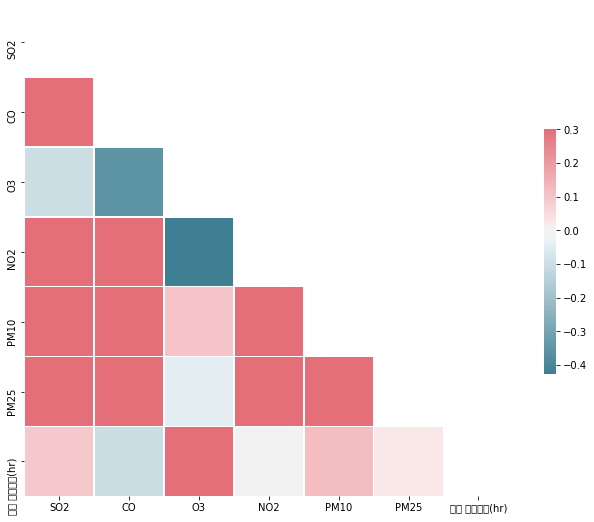

In [132]:
# Compute the correlation matrix
corr = tom_f.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

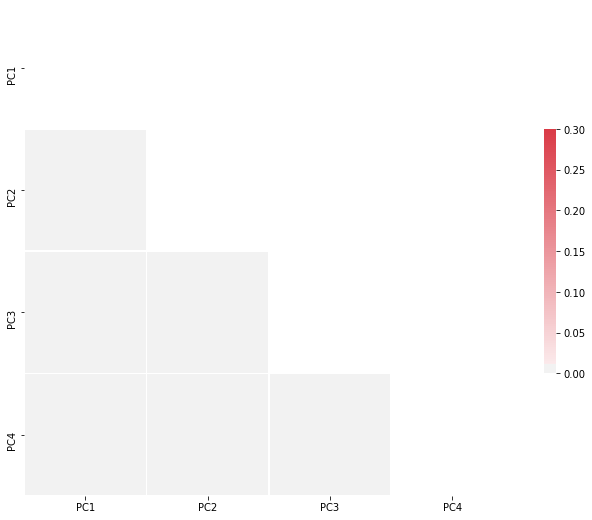

In [133]:
# Compute the correlation matrix
corr = pcadf.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [131]:
import warnings
warnings.filterwarnings('ignore') # warning 메시지 제거